# Basit Doğrusal Regresyon

## Modelleme 

In [1]:
# Veri Setinin Hikayesi; Reklam Harcamalarini Ifade Eden Bir Veri Setidir, TV, Radio, ... fln Reklamlar Veriliyor Ve Bu Reklamlar Neticesinde Satislar Elde Ediliyor,
# Bu Reklam Harcamalarinin Satis Giderlerinin Ortaya Cikardigi Yapiyla Ilgili Bir Veri Setidir.

In [2]:
import pandas as pd
ad = pd.read_csv("../input/advertisingcsv/Advertising.csv", usecols = [1,2,3,4])
# Indexi Degisken Olarak Almis ----->> usecols = [1,2,3,4] ----->> Bu Ifadeyi Bu Yuzden Kullaniyoruz ----->> ( Sik Karsilasilan Bir Problem )
# Ustteki Hatayi Cozmenin Baska Yontemleri De Var ( Assagidaki Code'ye Bak )
df = ad.copy()
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
#df = df.iloc[:,1:len(df)] ------->> Hatayi Bu Sekilde De Cozebiliriz

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe().T # Betimsel Istatistikler

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [6]:
df.isnull().values.any() # Veri Setinin Icerisinde Eksik Gozlem Varmi Diye Sorduk ----->> Yok

False

In [7]:
# Degiskenlerin Dagilimlarini Ve Korelasyonlarini Bir Code Ile Inceleyelim
# TV Ile Satis ( Sales ) Arasinda Guzel ( Yuksek ) Bir Korelasyon Var ---->> Buradan Cikarilacak Yorum; TV Harcamalari Arttikca Satislarinda Artacagini Soyluyoruz
# En Anlamli Ve Etki Duzeyi Yuksek Olan Degisken TV Olarak Gozukmektedir
# Bide Bunu Grafikte Gozlemleyelim
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


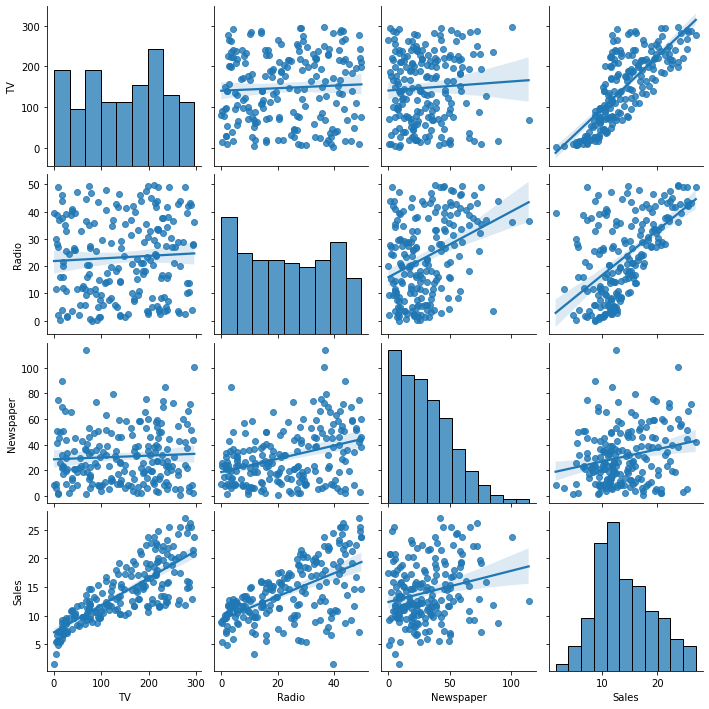

In [8]:
import seaborn as sns

sns.pairplot(df, kind  ="reg");

# TV Ile Sales Degiskeni Arasinda Guzel Bir Korelasyon Var Fakat Radio Ile TV Arasinda Guzel Bir Korelasyon Yok Yani Sales Degiskenini Anlarken TV'yi ------->>
# Kullanabilecegimiz Gibi Radio'yuda Kullanabiliriz ---->> ( Bu Cikarimlari Yapabilmek Icin Bu Grafikleri Kullaniyoruz )

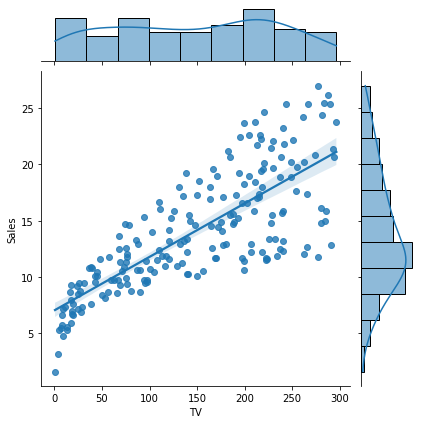

In [9]:
sns.jointplot(x = "TV", y = "Sales", data = df, kind = "reg");
# Yorum; Grafikte En Ustte Bulunan Yerde Ki Grafik TV'nin Iki Tepeli Bir Yapida Oldugunu Gosteriyor, En Sagda Gorulen Tek Tepeli Olan Grafik Satislarin Grafigidir -->>
# Ve Normal Dagilmistir

# Bu Ifadeleri Gorup Yorumlama Amacimiz Degiskenlerin Birbirleri Ile Olan Iliskilerini, Normal Dagilim Olup Olmadigini Gorup Makine Ogrenimine Sokma Islemi ------>>
# Yaparken ( Degiskenleri Secme Veya Disarida Birakma Islemi ) Yol Gosterici Bir Dusunce Kazandiricak

## Statsmodels ile modelleme

#### Ilk Modelleme :)

In [10]:
import statsmodels.api as sm

In [11]:
X = df[["TV"]] # Degiskenimizi Seciyoruz ----->> Elimizde Tek Degiskenden Olusan Bir Matris Var 

X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [12]:
# Bu X Matrisine Ve Tek Degisken Olmasindan Dolayi Ve Matris Islemlerinin Yapilabilmesi Icin Degisken Olarak Bir ( 1 ) Ifadesini Eklicez

X = sm.add_constant(X)

In [13]:
X[0:5] # Gorulecegi Uzere 1 Ifadesi Eklendi

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [14]:
y = df["Sales"] # Bagimli Degiskeni De Esitlemis Olduk

In [15]:
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [16]:
# lm ---->> Linear Model

lm = sm.OLS(y,X) # Model Kurma Islemi Burada Gerceklestirildi

In [17]:
model = lm.fit()

In [18]:
model.summary() #   .summary()   Fonksiyonu IleModelin Ciktilarina Erisiyoruz


# 3 Farkli Cikti Arasindan En Usttekini Yorumluyoruz ( 0. Indexte Yer Alan Yer Olarak Geciyor ) ( Tables'in 0. Indexindeki Yer )


# Bu Grafikte EN ONEMLI Olan Yer ------>> R Kare Degeri ( R-squared ) Ifade Edilmis
# R Kare Degeri; Bagimsiz Degiskenin Bagimli Degiskendeki Degiskenligi Aciklama Basarisidir ------>> Yani Burada Elimizdeki TV Degiskeni Satis Degiskeninde Yer Alan
# Degiskenligin Yaklasik %60 Ini ( 0.612 ) Aciklayabilmektedir

# Adj. R-squared; Duzeltilmis R Kare Degeri
# Duzeltilmis R Kare Degeri Ile R Kare Degeri Arasinda Ne Fark Var Soyleki R Kare Degeri Formulasyon Itibari Ile Modele Ne Kadar Fazla Degisken Eklersek Ekleyelim
# Sismeye Meillidir ( Artacaktir ) Dolayisi Ile Modelde Ilgili Ilgisiz, Anlamli Anlamsiz Degisken Olmasi Durumunda R Kare Artacaktir


# R Kare; Aciklanabilirlik Oranidir
# Dolayisi Ile Modele Ilgili Ilgisiz Bir Cok Degisken Ekleyip R Kare'nin Arttigini Gordugumuzde Iyi Bir Yolda Oldugumuzu Dusunebiliriz Bu Cok "Yaniltici" Bir Durumdur
# Iste Bu Duzeltilmis R Kare, R Karenin Her Paremetre Eklenmesine Karsi Olan Duyarliligini Torpuleyen Duzenleyen Duyarliligi Daha Az Olan Bir Metriktir
# Dolayisi Ile Su An Burada Bu Problem Icin Cok Gecerli Olmasa da Cok Fazla Degisken Oldugunda "Duzeltilmis R Kare" Degeri Bizim Icin Daha Duzgun Bir Degerdir 


# Burada Bagimli Degisken ( Dep. Variable ) Ifade Edilmis ----->> Sales
# Method En Kucuk Kareler ( Least Squares ) Olarak Ifade Edilmis


# F-statistic; F Istatistigi degeri Modelin Anlamliliginin Anlasilmasi Icin Kurulan Test Istatistigidir ----->> Yani Biz Modeli Kurduk Model Bize Bazi Tahminler
# Vericek Belli Bir Basarisi Olucak vb. Ama Anlamlimi? Gibi Bir Soruyuda Istatistiki Olarak Test Edip Modelin Anlamliligina Iliskin F Istatistigidir Bu


# Prob (F-statistic); Modelin Anlamliligina Iliskin P Value Degeri ( Burada Bu Kutuphaneyi Yazan Prob Olarak Adlandirilmis )( Bazi Yerlerde significance Olarak Gecer )
# Bu Deger Incelendiginde Ve F Istatistigi Incelendiginde Modelin Anlamli Oldugu Gozukmektedir


# No. Observations; Gozlem Sayisi


# Df Residuals; Serbestlik Derecesi


# Genel Olarak Bizim Bu Ciktida Onemli Olarak Gordugumuz Simdilik Model Anlamli Olup Olmamasi Ve R Kare Degeri'dir



# Orta Tarafta Bulunan Ciktiyi Yorumluyoruz ( coef Ve const Degerleri Bu Modeldeki En Onemli Kisimdir ) ( 1. Indexte Yer Alan Yer Olarak Geciyor )
# ( Tables'in 2. Index'indeki Yer )


# coef; Modelde Kullandigimiz Bagimsiz Degiskenimizin Katsayisi
# const; Sabit Katsayi
# std err; Standart Hata
# Bunlarin Anlamli Olup Olmadigini Anlamak Icin t Istatistigi Ve t Istatistigine Iliskin P Value Degerleri Verilmis ( Ikisininde (const, TV) Anlamli Oldugu Goruluyor )
# Yani Sabit Katsayi Ve TV Degiskenimiz Icin Katsayilar Anlamli
# Bide Orta Bolumun Sag En Ust Bolumunde ---->> Bide Bu Katsayilarin Guven Araligi Verilmis ------>> Yorum ----->> Yani Bize Sunu Soyluyor ----->> Bizim Hesaplamis
# Oldugumuz TV'ye Iliskin  0.0475 Seklinde Olan Katsayimiz Istatistiksel Olarak Anlamdilir ( 0.000 ) Ve Bu Katsayi Yine Istatistiksel Olarak %95 Guvenilirlik Ile
# Bu Aralikta Yer Alacaktir Seklinde Bir Bilgi Sunmus



# ( const Ve coef In Kesisimini Yorumluyoruz )
# Simdi Bi Seyler Yorumlayalim; const ( Sabit ) Egrinin Y Eksenini Kestigi Nokta Demistik Dolayisi Ile Diger Degiskenlerde Hicbir Degisiklik Olmadiginda Y'nin Beklenen
# Degeridir Aslinda ( 7.0326 ) , Yani Ortalama Bir Satistir Yani TV'nin Bir Etkisi Olmadiginda Satislarda Zaten Olmasini Bekledigimiz Ortalama Satis Miktari 7.0326 Dir


# ( TV Ve coef In Kesisimini Yorumluyoruz )
# TV Harcamalarinda 1 Birimlik Artis Oldugunda Satislarda Bu Kadarlik ( 0.0475 ) Ortalama Artis Olmasi Beklenir Seklinde Yorumlanir

# Burada Her Bir Degiskenin ( Cok Fazla Da Olabilirdi Degisken ) Bagimli Degiskene Olan Etkilerini Gorebiliriyoruz ---->> Yani TV De Bir Birimlik Artis Oldugunda
# Satislarda Ortalama Ne Kadar Bir Artis Olabilecegi Bize Bilgisi Verilmis ( Bu Yorumlamalar Bize Degerlendirme Yapabilme Imkani Saglayacak )


# En Alttaki Yer ( 2. Indexte Yer Alan Yer Olarak Geciyor ) ( Tables'in 2. Index'indeki Yer )


# ( Simdilik Bu Bilgiler Yeterli Burasi Icin )

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 19 May 2022   Prob (F-statistic):           1.47e-42
Time:                        21:57:45   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Degiskenleri Ifade Etme Seklini Yukarida   lm = sm.OLS(y,X)   Bu Sekilde Ele Almistik Bunu Farkli Sekilde DE Yapabiliriz ( Bu Ifadeler De Ayni Modeli Kurdu Bize )

# Fakat Buradaki Farklilik Degiskenlerin Isimlerini Kendimiz Asagidaki Gibi Yazmak Istersek Kullanabilecegimiz Bir Tur   lm = smf.ols("Sales ~ TV", df)   Buradaki Gibi

import statsmodels.formula.api as smf
lm = smf.ols("Sales ~ TV", df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 19 May 2022   Prob (F-statistic):           1.47e-42
Time:                        21:57:45   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
model.params # Modelin Parametreleri Geldi Bunlar Beta 0 Ve Beta 1 Degerleri Sonucunda Ulastigimiz Seyler

Intercept    7.032594
TV           0.047537
dtype: float64

In [21]:
model.summary().tables[0] # Tebles'in Icerisinden 0. Elemani Bana Getir Diyoruz

Dep. Variable:,Sales,R-squared:,0.612
Model:,OLS,Adj. R-squared:,0.610
Method:,Least Squares,F-statistic:,312.1
Date:,"Thu, 19 May 2022",Prob (F-statistic):,1.47e-42
Time:,21:57:46,Log-Likelihood:,-519.05
No. Observations:,200,AIC:,1042.
Df Residuals:,198,BIC:,1049.
Df Model:,1,,
Covariance Type:,nonrobust,,


In [22]:
model.summary().tables[2] # Tebles'in Icerisinden 2. Elemani Bana Getir Diyoruz

Omnibus:,0.531,Durbin-Watson:,1.935
Prob(Omnibus):,0.767,Jarque-Bera (JB):,0.669
Skew:,-0.089,Prob(JB):,0.716
Kurtosis:,2.779,Cond. No.,338.


In [23]:
# Katsayi Detaylarina Ulasmak Istersek

model.summary().tables[1] # Tebles'in Icerisinden 1. Elemani Bana Getir Diyoruz

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [24]:
# Katsayilar Bizim Icin Onemlidir Peki Katsayilarin Guven Araliklarina Ulasmak Istersek

model.conf_int() # Gorulecegi Uzere ( Bir Ustteki Yere Gore Karsilastirdigimizda ) Katsayilarda Yuvarlama Islemi Yapilmis

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [25]:
# Modelin Anlamliligina Iliskin Istatistiklere Sadece Ulasmak Istersek

model.f_pvalue # Ciktida Gorulecegi Uzere e Ifadesi Var Bu Rahatsiz Etmis Olabilir Bizleri Bunu Cozmek Icin Yontem ---->>

print("f_pvalue : ", "%.3f" % model.f_pvalue) #   "%.3f"   Su Ifade Ile Yazdirma Seklini Tanimliyoruz ---->> Virgulden Sonra 3 Basamak ---->> Bu Ifadeden Sonra
# Yazdigim Ifade ( % model.f_pvalue ) Sag Tarafa Yazdigim Ifadeyi Sol Tarafa Baglama Islemi Yapacak ---->> Cikti Virgulden Sonra 3 Basamak Olacak Sekilde Yazdirildi

f_pvalue :  0.000


In [26]:
# F Value Degerine De Su Sekilde Ulasabiliriz

print("fvalue : ", "%.3f" % model.fvalue)

# Su Virgulden Sonra Muhabbetinin Anlasilmasi Icin Bir Tane Daha Ornek Yapiyorum

print("\n")

print("fvalue : ", "%.2f" % model.fvalue)

fvalue :  312.145


fvalue :  312.14


In [27]:
# Parametre Anlamliligina Eriskin Degerlere Erismek Istersek

print("tvalue : ", "%.2f" % model.tvalues[0:1])

tvalue :  15.36


In [28]:
# Modelin Anlamliligina Iliskin Model Degerlendirilme Istatistiklerine Ulasmak Istersek 

model.mse_model # Hata Kareler Ortalamasi Degerine Erismis Olduk ( Modelin Basarisi Ile Ilgili Ilk Istatistige Ulastik )

# Yorum; ( Satislarin ) Ortalamasi 14 Olan Bir Degisken Icin Cikan Sonuc Cok Korkunc, Birim Basina Yapilacak Hata Cok Korkunc Bir Sayi
# ( Model fln Olmamis Sadece Ogrenmek Icin Yapiyoruz, Cok Guzel Bir Sonuc Cikmadi )

3314.6181668686486

In [29]:
model.rsquared # R Kare Degeri ( Aciklanabilirlik Orani Gercek Hayat Icin Uygun Cok Kotu Bir Deger Degil Bunu Soyleyebiliriz )

0.611875050850071

In [30]:
model.rsquared_adj # Duzeltilmis R Kare Degeri

0.6099148238341623

In [31]:
# Artik Nasil Ulasicagimizi Fln Ogrendik, Artik Olayin Aslina Donelim

In [32]:
# Tahmin Edilen Degerler

model.fittedvalues[0:5] # Daha Oncesinde Model Kurduk Model Icerisinden Tahmin Ettigimiz Y Degerleri

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [33]:
# Gercek Degerlere Ulasmak Istersek

y[0:5] # Gercek Y Degerleri

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

## Modelin Denklemini Yazma ( Onemli )

In [34]:
print("Sales = " +  str("%.2f" % model.params[0]) + " + TV" + "*" + str("%.2f" % model.params[1])) # Burasi Modelin Matematiksel Formu

# Satislar Esittir Dedik, String Olarak Iki Basamakli Olmasi Durumunu Ifade Ettik, Model Parametrelerinden 0'i Cektim Ki Bu Deger 7.03
# Arti Dedik TV Carpi Model Parametrelerinden 1'i Cektim

# Simdi Bu Ne Anlama Geliyor ---->> Denklemi Olusturduk Gelecek Bilgiler Hakkinda Belli Cikarimlar Yapabilmek Icin Bir Model Olusturduk Ve Tahmin Etme Dedigimiz Kisim
# Burasi Oluyor ( Bu Denklem ) ----->> Mesela 1000 Lira Butce Ayirirsam TV Reklamlarina Bizim Satisimiz Ne Olur Sorusunu Burada Cevaplayabiliyoruz

Sales = 7.03 + TV*0.05


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


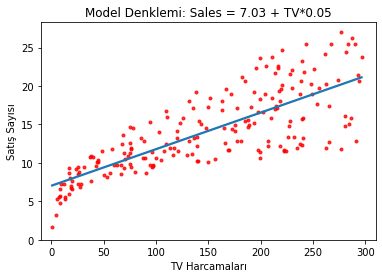

In [35]:
# Modelin Gorsel Olarak Neyi Ifade Ettigine Bakalim

g = sns.regplot(df["TV"], df["Sales"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
import matplotlib.pyplot as plt
plt.xlim(-10,310)
plt.ylim(bottom=0);


# Bunun Geometrik Formuda Bu Sekildedir

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
X = df[["TV"]]
y = df["Sales"]
reg = LinearRegression() # Burada Bir Nesne Olusturuyoruz ( Ornekleme Olusturmus Oluyoruz Yani )
model = reg.fit(X, y)
model.intercept_ # Katsayiyi Aldik

7.032593549127695

In [38]:
X = df[["TV"]]
y = df["Sales"]
reg = LinearRegression() # Burada Bir Nesne Olusturuyoruz ( Ornekleme Olusturmus Oluyoruz Yani )
model = reg.fit(X, y)
model.intercept_
model.coef_ # Burada Da Beta 1 Katsayisini Da Almis Olduk

array([0.04753664])

In [39]:
model.score(X,y) # R Kare Degeri

0.611875050850071

In [40]:
model.predict(X)[0:10] # Tahmin Edilen Degerlere Ulasmak Icin ( Cok Sevdigimiz Bir Fonksiyondur ) ( Cok Fazla Kullanicaz )

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

## Tahmin

Model denklemi:

Sales = 7.03 + TV*0.04

Örneğin 30 birim TV harcaması olduğunda satışların tahmini değeri ne olur?

In [41]:
7.03 + 30*0.04

8.23

In [42]:
X = df[["TV"]]
y = df["Sales"]
reg = LinearRegression()
model = reg.fit(X, y)

In [43]:
# predict() ----->> Kendisine Girilen Degeri Kurmus Oldugumuz Modele Yani Denkleme ( 7.03 + TV*0.04 ) Gondericek Bu Denklemde Kendisinin Girebilecegi Yer Varsa Girip Buna Yonelik
# Olarak Cikti Uretecek, Gercek Degerlerle Bir Tahmin Etme Islemi Yapicak

In [44]:
# Tahmin Etme Islemi Gerceklestirdik

model.predict([[30]]) # Uc Ustteki Ile Ayni Islemi Yaptik( Bizimkinden Farkli Sonuc Cikmasi 7.03 Ifadesinin Virgulleri Vardi Biz Uzun Uzun Almadigimiz Icin Islem Ona Gore Yapildi )

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([8.45869276])

In [45]:
yeni_veri = [[50], [90], [200]]

model.predict(yeni_veri) # Bu Sekilde De Kullanabiliyoruz

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([ 9.40942557, 11.31089119, 16.53992164])

## Artıklar ve Makine Öğrenmesindeki Önemi

( Bilgilendirme) ---->> Artik = Hata

In [46]:
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
lm = smf.ols("Sales ~ TV", df)
model = lm.fit()

In [48]:
mse = mean_squared_error(y, model.fittedvalues) # Tahmin Edilen Degerler Ile Gercek Degerler Arasindaki Farklarin Karelerinin Ortalamasi Var Su An Elimizde

In [49]:
mse # Hata Kareler Ortalamasi

10.512652915656753

In [50]:
import numpy as np

rmse = np.sqrt(mse) # mse'nin Kare Kokunu Aldik

In [51]:
rmse

3.2423221486546883

In [52]:
reg.predict(X)[0:10] # Tahmin Edilen Degerler ( Tahmin Islemi Gerceklesti )

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [53]:
y[0:10] # Gercek Degerler

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: Sales, dtype: float64

In [54]:
# Karsilastirma Tablosu Yapicaz ( Amacimiz Artiklari Burada Ele Almak )

k_t = pd.DataFrame({"gercek_y": y[0:10],
                   "tahmin_y": reg.predict(X)[0:10]})

In [55]:
k_t

,gercek_y,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [56]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]

In [57]:
k_t

,gercek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [58]:
# Ortalama Olarak Ne Kadar Hata Yapmisiz Onu Hesaplicaz ( Hata Icerisinde Negatif ( - ) Deger Oldugu Icin Bunlari Yok Edicez Cunku Bunlar Uzaklik Belirtiyor Negatif Olamaz )

k_t["hata_kare"] = k_t["hata"]**2

In [59]:
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [60]:
np.sum(k_t["hata_kare"]) # Toplam Hata

92.90350329638102

In [61]:
np.mean(k_t["hata_kare"]) # Hata Kareler Ortalamasina Ulasmak Istersek

9.290350329638102

In [62]:
# Yukaridaki Ifadenin Kare Kokunu Alirsak

np.sqrt(np.mean(k_t["hata_kare"]))

3.048007599996775

In [63]:
model.resid[0:10] # Modelin Artiklarini Ifade Eder

0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
dtype: float64

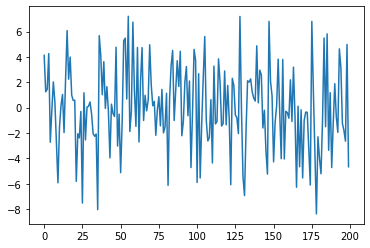

In [64]:
plt.plot(model.resid); # Artiklarin Gorsellestirilmesi

# Çoklu Doğrusal Regresyon

#### Temel Amac, Bagimli Ve Bagimsiz Degiskenler Arasindaki Iliskiyi Ifade Eden Dogrusal Fonksiyonu Bulmaktir.


* Hatalar Normal Dagilir.
* Hatalar Birbirinden Bagimsizdir Ve Aralarinda Otokorelasyon Yoktur.
* Her Bir Gozlem Icin Hata Terimleri Varyanslari Sabittir.
* Degiskenler Ile Hata Terimi Arasinda Iliski Yoktur.
* Bagimsiz Degiskenler Arasinda Coklu Dogrusal Iliski Problemi Yoktur

In [65]:
import pandas as pd
ad = pd.read_csv("../input/advertisingcsv/Advertising.csv", usecols = [1,2,3,4])
df = ad.copy()
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Burada - Ayirma - Islemlerini Yapmaya Basliyoruz

In [66]:
X = df.drop("Sales", axis = 1) # Sales Degiskenini Disarida Birakip Tum Bagimsiz Degiskenleri Secme Islemi Yaptik

y = df["Sales"]

In [67]:
X[0:10] # X'e Neyi Atadigimizi Gormek Icin Yazdim

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
5,8.7,48.9,75.0
6,57.5,32.8,23.5
7,120.2,19.6,11.6
8,8.6,2.1,1.0
9,199.8,2.6,21.2


In [68]:
y[0:10] # y'e Neyi Atadigimizi Gormek Icin Yazdim

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: Sales, dtype: float64

In [69]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

In [71]:
X_train.shape

(160, 3)

In [72]:
y_train.shape

(160,)

In [73]:
X_test.shape

(40, 3)

In [74]:
y_test.shape

(40,)

In [75]:
training = df.copy() # Veri Setimizin Tumunu Buraya Kopyaladik

In [76]:
training.shape # Veri Setimizin Ilk Hali

(200, 4)

## Statsmodels ( Yorumlama Icin Kullanilir )

* Eger Yorumlama Ihtiyaclarimiz ( Beklentilerimiz ) Varsa "Statsmodels" Kutuphanesini Kullanmamiz Lazim

In [77]:
lm = sm.OLS(y_train, X_train)

In [78]:
model = lm.fit()

In [79]:
model.summary()

# R Kare Degeri Artmis Cunku Hem Degiskenler Artti, Hemde Aciklanabilirligi Oldugu Varsaydigimiz Degiskenler Var Bu Modelde ----->>
# ----->> ( Televizyon Harcamalari - Radyo Harcamalari - Gazete Harcamalari Seklinde)

# Katsayilara Batigimizda Butun Katsayilar Anlamlidir ( Modelde Kullanmak Icin Aldigimiz Butun Degiskenler Anlamli )

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2935.
Date:                Thu, 19 May 2022   Prob (F-statistic):                   1.28e-137
Time:                        21:58:00   Log-Likelihood:                         -336.65
No. Observations:                 160   AIC:                                      679.3
Df Residuals:                     157   BIC:                                      688.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
Radio          0.2188      0.011     20.138      0.000       0.197       0.240
Newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Tavsiye;

##### Hangi Algoritmayi Kullanacak Olursaniz Olun Eger Hedefinizde Bir Surekli Degisken Soz Konusu Ise ( Surakli Bir Degisken Varsa ) Oncelikle Mutlaka Dogrusal Bir Modele Sokup Bu Degiskenlerin
##### Analitik Anlamda Bagimli Degiskene Olan Etkilerinin Anlamli Olup Olmadigini Boyle Bir Degisken Anlami Inceleyebilmek Adina Yapmaliyiz

In [80]:
model.summary().tables[1] # 1. Indexteki Tabloya Ulasmak Icin Kullandik

,coef,std err,t,P>|t|,[0.025,0.975]
TV,0.0531,0.001,36.467,0.000,0.050,0.056
Radio,0.2188,0.011,20.138,0.000,0.197,0.240
Newspaper,0.0239,0.008,3.011,0.003,0.008,0.040


In [81]:
# Bagimli Degiskendeki Degisikligin Bagimsiz Degiskenlerce Aciklanabilme Oranini Vermektedir Yani Modeldeki Bagimsiz Degiskenler Elimizdeki Bagimli Degiskenin
# Varyansinin ( Atiyorum ) Su kadarini Aciklar Derler ( Degisimi Kastediyoruz ) ( Aciklanabilirlik Oranidir )


# F Istatistigi Ise Modelin Anlamliligini Degerlendirir

## scikit-learn model

In [82]:
lm = LinearRegression()

# X_train : Bagimsiz Degiskenleri Ifade Eder ( 1. Arguman )
# y_train : ( 1. Arguman )

model = lm.fit(X_train, y_train) # Modelimizi Kurduk

In [83]:
model.intercept_ # Sabit Katsayiya Ulastik

2.979067338122629

In [84]:
model.coef_ # Diger Tum Katsayilara Ulastik

array([0.04472952, 0.18919505, 0.00276111])

## Tahmin

* Model denklemi:
* Sales = 2.97 + TV0.04 + radio0.18 + newspaper*0.002
* Örneğin 30 birim TV harcaması, 10 birim radio harcamasi, 40 birimde gazete harcaması olduğunda satışların tahmini değeri ne olur?


In [85]:
yeni_veri = [[30], [10], [40]] # Elimizde Uc Degisken Icin Ayri Yeni Gozlenmis Deger Soz Konusu
yeni_veri = pd.DataFrame(yeni_veri).T # Data Frameye Cevirdik ----->> Anlayabilecegi Formata Getirdik

In [86]:
yeni_veri # Gormek Icin Yazdim

,0,1,2
0,30,10,40


In [87]:
model.predict(yeni_veri) # Bana Bir Deger Tahmini Gelmis Oldu

# Ornegin TV'de 30 Birim, Radio'da 10 Birim, Gazete Icin De 40 Birim Harcama Yaptigimizda Satislarimizin Beklenen Degeri  Ciktinin Degeri Olucak ( 6.32334798 )

# Modelde Tahmin Islemini Gerceklestirdik Ama Bizim Modelimizin Tahmin Basarisi Nedir?

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([6.32334798])

In [88]:
# Model Tahmin Basarisi

rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train))) # Egitim Setinin Hatasina Ulasmaya Calisiyoruz ------>> y_train --->> Train Icerisindeki ----->>
# ----->> Gercek Degerlerimiz Ve ----->>  model.predict(X_train)  ----->> Bu Gercek Degerleri Modelleyerek train Uzerinden Tahmin Ettigimiz y Tahmin Degerleri Var Burada

rmse # Bu Bizim Egitim Hatamiz

1.644727765644337

In [89]:
# Test Hatamizi Nasil Hesaplicaz Peki?

rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

# y_test : Test Setinin Bagimli Degiskenini Isaret Ettim
# model.predict(X_test) : Bu Kurmus Oldugum Modeli, Egitim Seti Uzerinden Modeli Egittim Model Elimde, Test Etmek Icin Bu Sefer Disarida Biraktigim x Bagimsiz Degiskenlerini Girmis
#  Oluyorum Ve Ne Yapmis Olucam Egitim Veri Setiyle Kurup Katsayilarina Ulastigim Modeli Kullanarak Modelin Daha Once Hic Gormedigi Ve Bagimsiz Degisken Degerlerinden Olusan
# Test Setinin Degerlerini Kullanip Bir Tahmin Ureticem ( Y Tahmin Degerleri Olucak Bunlar ) Bu y Tahmin Degerlerini "y_test" Degerleri Ile Karsilastiricam

In [90]:
rmse # Test Seti Hatamiza Ulastik

1.78159966153345

## Model Tuning / Model Doğrulama

In [91]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [92]:
X = df.drop("Sales", axis=1)
y = df["Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=144)
lm = LinearRegression() 
model = lm.fit(X_train, y_train)

In [93]:
# Simdi Biz Burda "random_state" Degerini 42 Yazdik Sonra 99 Yazdik Asagidaki Degerler Degisti, Sonra 144 Yazdik Asagidaki Degerler Degisti ( Degisti mi Degerler?)
# Yani Sen Modelin Belirli Bir Kismini Seciceksin Ama Hangi Belirli Kismini Seciceksin? Gibi Bir Problemimiz Var
# Iste Bu Problemi Ortadan Kaldirabilmek Adina "Cross Validation" Yontemi Kullanilir

np.sqrt(mean_squared_error(y_train, model.predict(X_train))) # Egitim Hatasi ( Degisti ) ( rmse Degeri )

1.6748559274650712

In [94]:
model.score(X_train, y_train) # R Kare Degeri ( Degisti )

0.8971614078663419

In [95]:
cross_val_score(model, X, y, cv = 10, scoring = "r2") # Bunu Butun Veri Seti Icin Yaptik

array([0.87302696, 0.8581613 , 0.92968723, 0.89013272, 0.93146498,
       0.93138735, 0.7597901 , 0.91217097, 0.83891753, 0.92882311])

In [96]:
cross_val_score(model, X_train, y_train, cv = 10, scoring = "r2")

# cv = 10 ---->> Kac Katli Cross Validation Oldun Diye Soruyoruz Cevap: 10

# Burada 10 Tane Birbirinden Farkli R Kare Degeri Geldi

array([0.86580772, 0.92273806, 0.90690214, 0.9124702 , 0.69765146,
       0.92654282, 0.92526348, 0.94823778, 0.92941476, 0.69875488])

In [97]:
cross_val_score(model, X_train, y_train, cv = 10, scoring = "r2").mean() # Bu Ifadenin Ortalamasini Aliyoruz

# Iste Bizim Modelimizin Daha Guvenilir Valide Edilmis ( Dogrulanmis ) R Kare Degeri Budur

0.873378329842294

In [98]:
# Soo Important

# Valide Etmek Budur Arkadaslar ( Farkli Degerler Cikti Karsimiza ) ----->> Valide Etmek Bize Daha Dogru Hata Elde Etme Imkani Verir

print(model.score(X_train, y_train)) # R Kare Degeri ----->> Train Icin Elde Ettigimiz Score Buydu

print("\n--------")

cross_val_score(model, X_train, y_train, cv = 10, scoring = "r2").mean() # Valide Edilmis Score Degeri

0.8971614078663419

--------


0.873378329842294

In [99]:
-cross_val_score(model, 
                X_train, 
                y_train, 
                cv = 10, 
                scoring = "neg_mean_squared_error") # Egitim Setimiz Icin 10 Adet Egitim Hatasi Olusturuldu Ve Bu Egitim Hatalarinin Her Biri Birbirinden Farkli

# Burada Dikkat Cekmek Istedigim Bir Parca Var Cikan Sonuclarda Verinin Bi Parcasinda Daha Yuksek Baska Bir Parcasinda Daha Alcak rmse Degerleri Goruluyor
# Iste Bu Parcalarin Ortalamasini Aldigimda Bunu Valide Etmis Oluyorum Ve Diyorum Ki Benim Gercek "Egitim Hatam" Budur

array([3.77011117, 1.38904597, 1.31506551, 3.32109589, 8.82506973,
       2.37926645, 2.2872061 , 1.05714426, 2.99532621, 3.15248307])

In [100]:
# "rmse Degeri" Icin Kare Kok Aliniyor Yukaridaki Code

np.sqrt(-cross_val_score(model, 
                X_train, 
                y_train, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean() # Basina Eksi ( - ) Ifadesi Koymamizin Sebebi Cikan Degerler Negatif Ciktigi Icin Onlari Pozitife Ceviriyoruz

1.6649345607872932

In [101]:
# Yine Valide Edilmis Deger Ile Butun Modeldeki Degerleri Karsilastiricaz Ama Bu Sefer Egitim De Degil Test Te yapicaz

np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

1.6640263686701027

In [102]:
np.sqrt(-cross_val_score(model, 
                X_test, 
                y_test, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()

1.7399924960346649

In [103]:
# Burada Ogrendigimiz Olay Valide Edilmis ( Dogrulanmis ) Degerleri Kullanmamiz Lazim